## Comparision of socio economic factors like gdp and per capita income with solar energy 


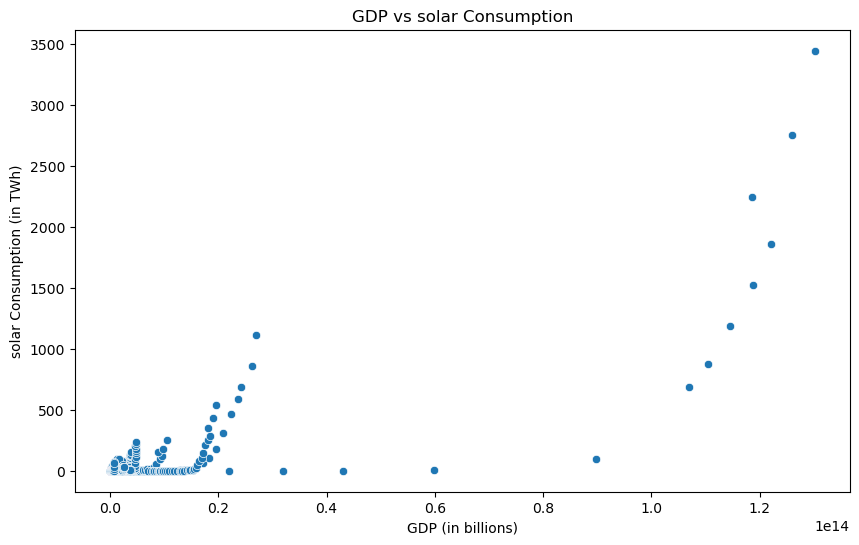

                        gdp  solar_consumption
gdp                1.000000           0.842097
solar_consumption  0.842097           1.000000


In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('owid-energy-data.csv')
cleaned_data = df.dropna(subset=['solar_consumption'])
# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp', y=('solar_consumption'))
plt.title('GDP vs solar Consumption')
plt.xlabel('GDP (in billions)')
plt.ylabel('solar Consumption (in TWh)')
plt.show()

# Correlation
correlation = df[['gdp', 'solar_consumption']].corr()
print(correlation)

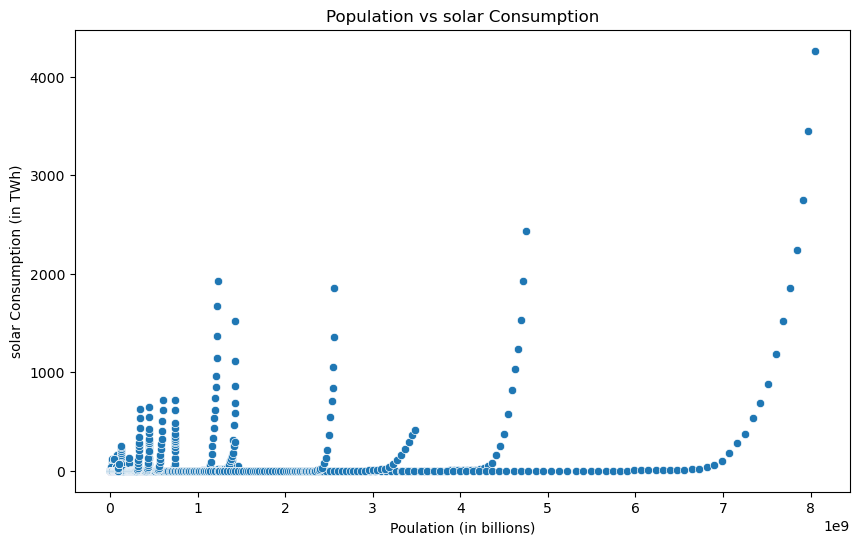

                   population  solar_consumption
population           1.000000           0.423824
solar_consumption    0.423824           1.000000


In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y=('solar_consumption'))
plt.title('Population vs solar Consumption')
plt.xlabel('Poulation (in billions)')
plt.ylabel('solar Consumption (in TWh)')
plt.show()

correlation = df[['population', 'solar_consumption']].corr()
print(correlation)

# Using Linear regressor model


Missing values in X before imputation: gdp    10037
dtype: int64
Missing values in y before imputation: 17028
Coefficient: [1.41424638e-11]
Intercept: 20.63350384594601


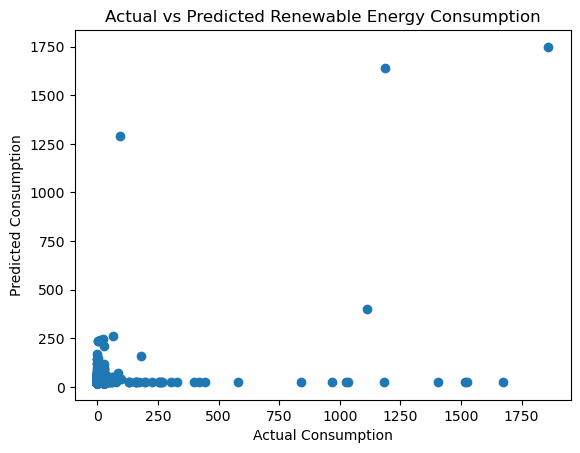

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['gdp']] 
y = df['solar_consumption'] 
print("Missing values in X before imputation:", X.isnull().sum())
print("Missing values in y before imputation:", y.isnull().sum())

#Applying the imputer
imputer_X = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')

# Impute missing values in features and target
X_imputed = imputer_X.fit_transform(X)
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel() 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Renewable Energy Consumption')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.show()


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Calculating mse and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error: 4302.2810
R² Score: 0.1439


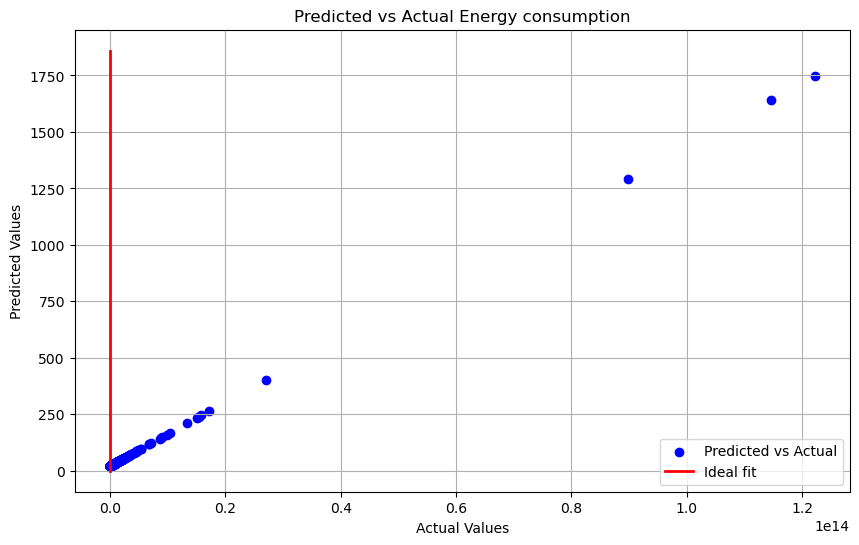

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Energy consumption')
plt.legend()
plt.grid(True)
plt.show()

# Using Random forest regressor

In [131]:
df = pd.read_csv('owid-energy-data.csv')

df.fillna(0, inplace=True)

X = df[['year', 'population', 'gdp']]
y = df['solar_consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0021])

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 2076.749334992328
Mean Absolute Error (MAE): 4.533896554617881
R-squared (R²): 0.6505974101608729


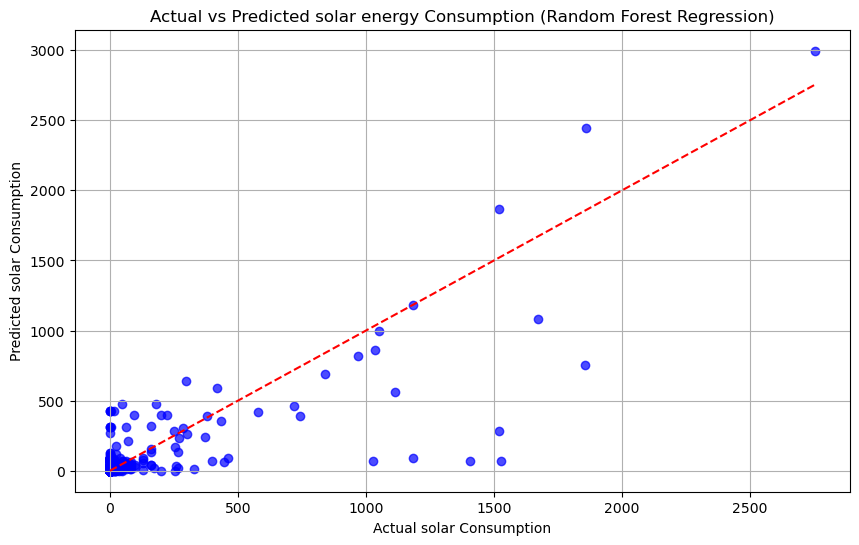

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted solar energy Consumption (Random Forest Regression)')
plt.xlabel('Actual solar Consumption')
plt.ylabel('Predicted solar Consumption')
plt.grid(True)
plt.show()

## USing ARIMA

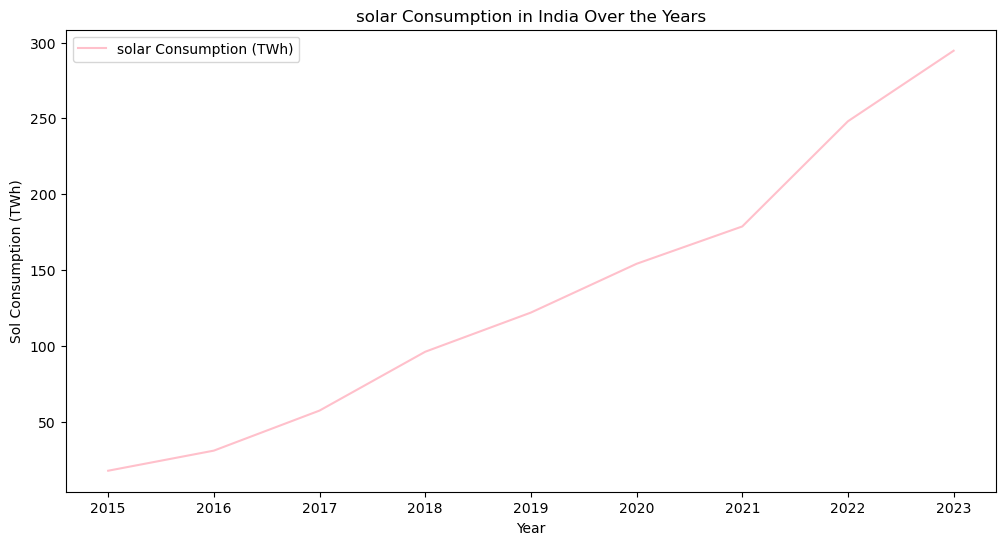

In [135]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt



india_solar_data = df[(df['country'] == 'India') & (df['solar_consumption'].notna())]

india_solar_data = india_solar_data[['year', 'solar_consumption']]
india_solar_data.set_index('year', inplace=True)

india_solar_data = india_solar_data.loc['2015':'2023']


plt.figure(figsize=(12, 6))
plt.plot(india_solar_data, label='solar Consumption (TWh)', color='pink')
plt.title('solar Consumption in India Over the Years')
plt.xlabel('Year')
plt.ylabel('Sol Consumption (TWh)')
plt.legend()
plt.show()


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Set random seed for reproducibility
np.random.seed(42)

data = {
    'year': list(range(1960, 2024)),
    'country': ['India'] * 64,
    'solar_consumption': np.random.randint(1000, 3000, size=64)  # Random values for demonstration
}
df = pd.DataFrame(data)

# Filter the data 
df_filtered = df[(df['country'] == 'India') & (df['solar_consumption'].notna())]
df_filtered['year'] = pd.to_datetime(df_filtered['year'], format='%Y')  # Convert 'year' to datetime
india_data = df_filtered[['year', 'solar_consumption']].copy()
india_data.set_index('year', inplace=True)



# Filtering from 2015-2023
india_data = india_data.loc['2015':'2023']
# ADF Test to check stationarity
result = adfuller(india_data['solar_consumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is non-stationary, we might want to difference it
if result[1] > 0.05:
    india_data['solar_consumption'] = india_data['solar_consumption'].diff().dropna()

# Fit the ARIMA model
model = ARIMA(india_data['solar_consumption'].dropna(), order=(2, 1, 2))  
model_fit = model.fit()


ADF Statistic: -1.4687509536107872
p-value: 0.5489092977195292


C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\shriy\AppData\Local\Temp\ipykernel_25092\323597683.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=f'{last_year + 1}', periods=forecast_steps, freq='Y')


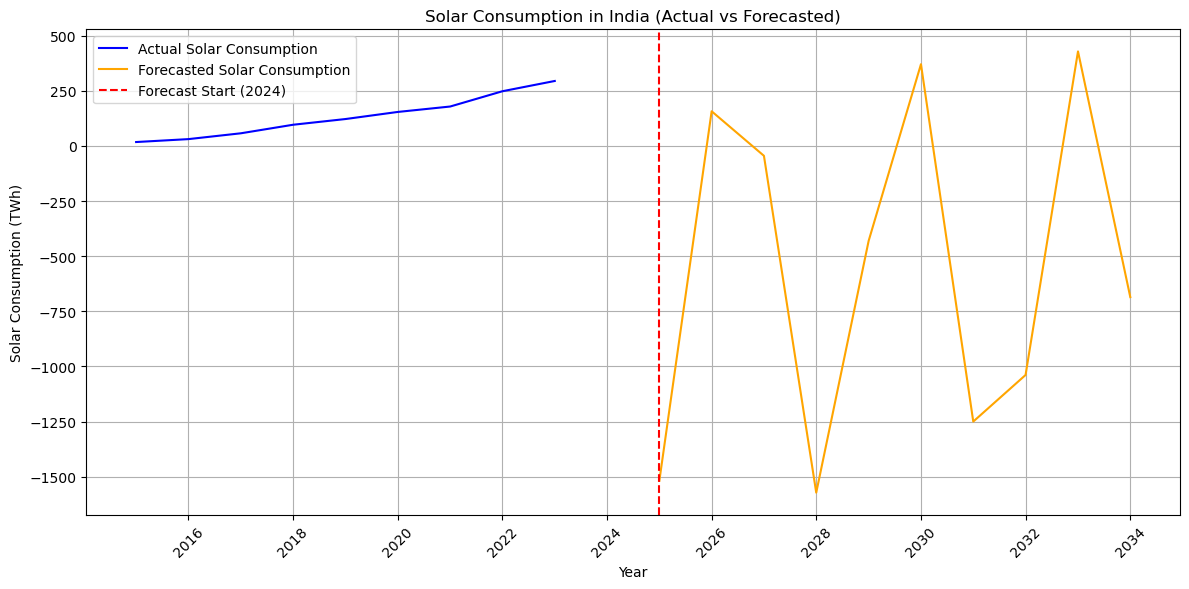

                 Year  Forecasted Consumption
2024-01-01 2024-12-31            -1518.644751
2025-01-01 2025-12-31              157.187917
2026-01-01 2026-12-31              -44.781167
2027-01-01 2027-12-31            -1572.342588
2028-01-01 2028-12-31             -430.027068
2029-01-01 2029-12-31              370.735062
2030-01-01 2030-12-31            -1249.944076
2031-01-01 2031-12-31            -1038.763790
2032-01-01 2032-12-31              428.732273
2033-01-01 2033-12-31             -685.577806


In [137]:

#Convert to datetime
india_hydro_data.index = pd.to_datetime(india_hydro_data.index, format='%Y')


forecast_steps = 10 
forecast = model_fit.forecast(steps=forecast_steps)

#  future years for the forecast (2024 to 2033)
last_year = india_hydro_data.index[-1].year
forecast_years = pd.date_range(start=f'{last_year + 1}', periods=forecast_steps, freq='Y')

forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted Consumption': forecast})


plt.figure(figsize=(12, 6))
plt.plot(india_hydro_data.index, india_hydro_data['solar_consumption'], label='Actual Solar Consumption', color='blue')
plt.plot(forecast_df['Year'], forecast_df['Forecasted Consumption'], label='Forecasted Solar Consumption', color='orange')
plt.title('Solar Consumption in India (Actual vs Forecasted)')
plt.xlabel('Year')
plt.ylabel('Solar Consumption (TWh)')
plt.axvline(x=forecast_years[0], color='red', linestyle='--', label='Forecast Start (2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Print the forecasted values
print(forecast_df)




In [138]:
from sklearn.metrics import r2_score, mean_squared_error

y_actual = india_hydro_data['solar_consumption'].loc['2015':'2023']
#Arima predictions
predictions = model_fit.predict(start=len(y_actual)-len(y_actual), end=len(y_actual)-1)

r2 = r2_score(y_actual, predictions)
print(f"R-squared: {r2}")
mse = mean_squared_error(y_actual, predictions)
print(f"Mean Squared Error: {mse}")


R-squared: -95.19202578348128
Mean Squared Error: 778287.159245393


### Comparing the results of ARIMA,Random Forest and Linear Regression
Based on the performance metrics, it’s clear that the Random Forest Regressor (RFR) comes out on top for predicting solar energy consumption. It has:

The highest R-squared (0.65), which means it explains most of the variability in the data.
The lowest MSE (2,076.75) and a decent MAE (4.53), showing that its predictions are way more accurate and consistent compared to the other models.
ARIMA, while typically used for time series, didn’t work well in this case—it has a super high MSE and a negative R², making it unsuitable for this dataset.

Linear Regression performed alright but still doesn’t match up to RFR. It explains much less variance at only 14% and has a higher error rate overall.

So, Random Forest Regressor turns out to be the most reliable model for predicting solar energy consumption based on these results.

## Comparing Population

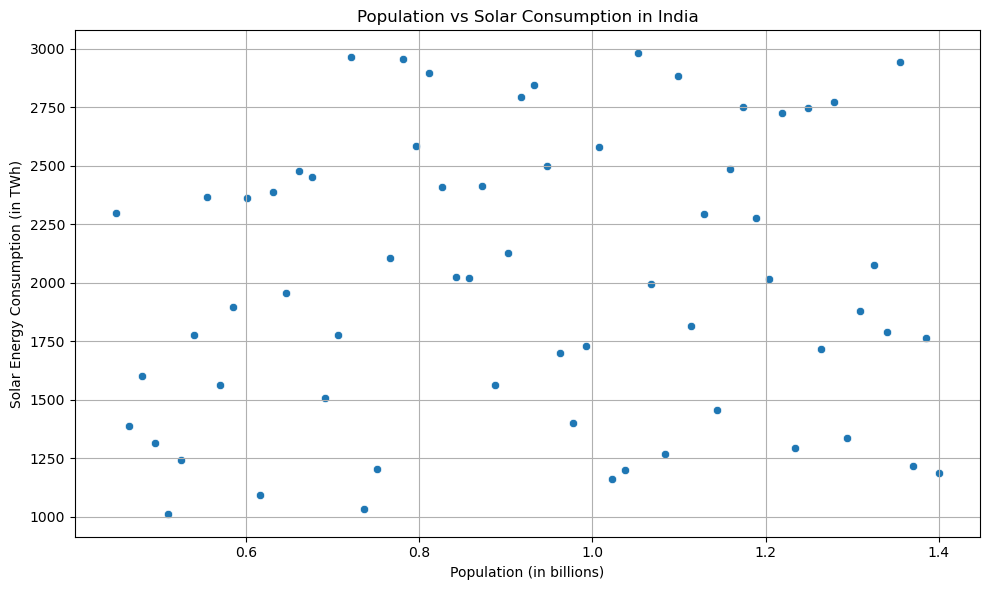

                   population  solar_consumption
population           1.000000           0.104023
solar_consumption    0.104023           1.000000


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'year': list(range(1960, 2024)),
    'country': ['India'] * 64,
    'solar_consumption': np.random.randint(1000, 3000, size=64) 
}

population = np.linspace(0.45, 1.4, 64)  # Linearly increasing population

# Add population to the data dictionary
data['population'] = population

# Convert the data into a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y='solar_consumption')
plt.title('Population vs Solar Consumption in India')
plt.xlabel('Population (in billions)')
plt.ylabel('Solar Energy Consumption (in TWh)')
plt.grid(True)
plt.tight_layout()
plt.show()
\
correlation = df[['population', 'solar_consumption']].corr()
print(correlation)
